# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

# # 1. Is the distribution of body temperatures normal?

In [3]:
# Graphical methods are used first.
df.head()


,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [4]:
df.shape

(130, 3)

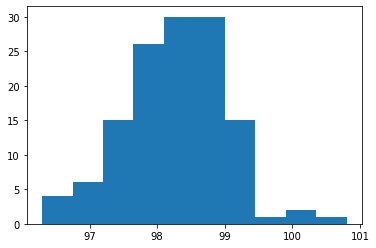

In [5]:
_=plt.hist(df['temperature'],bins=10)

In [6]:
temp=df['temperature']

In [7]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x= np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

In [36]:
mu=np.mean(temp)
print(mu)

98.24923076923078


In [9]:
sigma=np.std(temp)

In [10]:
samples=np.random.normal(mu,sigma,size=10000)

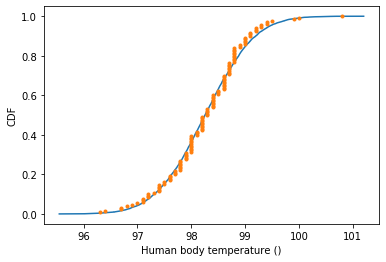

In [11]:
# Get the CDF of the samples and of the data
x_theor,y_theor=ecdf(samples)
x,y=ecdf(temp)

# Plot the CDFs and show the plot
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('Human body temperature ()')
_ = plt.ylabel('CDF')
plt.show()

In [12]:
from scipy.stats import normaltest
statistic, p_val = normaltest(df['temperature'])

print('chi-square statistic:',statistic)
print('p value =',p_val)

chi-square statistic: 2.703801433319203
p value = 0.2587479863488254


In [60]:
alpha=0.01
p = 0.2587479863488254
if p < alpha:  # null hypothesis: x comes from a normal distribution
 print("The null hypothesis can be rejected")
else:
 print("The null hypothesis can not be rejected,the data is normal distribution")


The null hypothesis can not be rejected,the data is normal distribution


### ANSWER Q1: Yes, the distribution appears to be normally distributed based on the cdf plot and normal test(p=0.259)

## 2. Is the sample size large? Are the observations independent?

In [14]:
print(len(temp))

130


In [58]:
##  in terms of picking between a T or Z test:
if len(temp)< 30:
 print :("In terms of picking between a T or Z test: The sample size is small  (n < 30)")
else:
    print("In terms of picking between a T or Z test:The sample size is large (n > 30)")

In terms of picking between a T or Z test:The sample size is large (n > 30)


### Answer Q 2: In terms of picking between a T or Z test, the sample size is large. However，the sample size at just over 130/5000M percent of the total human population (a rough estimate). Sothe sample size should not be considered as large sample size in terms of common sense.The observations are independent because 1) There is no correlation in body temp bwtween different peoples. 2) The sample size is less than 10% of total population.

## 3  Is the true population mean really 98.6 degrees ? 
• First, try a bootstrap hypothesis test. 
• Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why? 
• In this situation, is it appropriate to use the 𝑡 or 𝑧 statistic? 
• Now try using the other test. How is the result be different? Why?


In [37]:
## First, try a bootstrap hypothesis test. 
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data,func)

    return bs_replicates

In [43]:
# Would you use a one-sample or two-sample test? Why? 
# one-sample test was used,because we are comparing a sample set with a number (98.6)
# Make an array of translated temp with 98.6: temp_s
temp_s = temp-np.mean(temp)+98.6

# Take bootstrap replicates of temp_s: bs_replicates
bs_replicates = draw_bs_reps(temp_s, np.mean, 100000)
print(np.mean(bs_replicates))
# Compute fraction of replicates that are less than the observed body temp : p
p = np.sum(bs_replicates <= np.mean(temp)) / len(bs_replicates)

# Print the p-value
print('p = ', p)

98.59985036153846
p =  0.0


In [24]:
# The low p-value suggests that the null hypothesis of body temp is 98.6 is false.

In [20]:
## Now try using the other test. How is the result be different? Why? 

In [46]:
# z TEST: conduct one-sample z-test
from scipy.stats import ttest_1samp
t_stat, p_val_tt = ttest_1samp(df['temperature'], 98.6)

print('t-statistic:',t_stat)
print('p value =',p_val_t)

t-statistic: -5.4548232923645195
p value = 2.4106320415561276e-07


In [47]:
# z TEST: conduct one-sample z-test
from statsmodels.stats.weightstats import ztest
z_stat, p_val_zt = ztest(x1= df['temperature'], value = 98.6)

print('z-statistic:',z_stat)
print('p value =',p_val_z)

z-statistic: -5.4548232923645195
p value = 4.9021570141012155e-08


### ANSWER Q3: No, the true population mean appears to be different than 98.6 degrees (p-value = 2.4 1e-07), both t and z test give us same results,but because p density of t test has fatter tail, the p value is larger than that of z test. The sample size is large than 30, it's more suitable to use z test.

## 4.  Draw a small sample of size 10 from the data and repeat both frequentist tests. • Which one is the correct one to use? 
• What do you notice? What does this tell you about the difference in application of the 𝑡 
 and 𝑧 statistic? 


In [22]:
sample_10=np.random.choice(temp,size=10)

In [50]:
# conduct one-sample t-test:
t_stat, p_val_t = ttest_1samp(sample_10, 98.6)

print('t-statistic:',t_stat)
print('p value =',p_val_t)

t-statistic: -0.5812503153485841
p value = 0.5753374496289063


In [49]:
# conduct one-sample z-test:
z_stat, p_val_z = ztest(x1= sample_10, value = 98.6)

print('z-statistic:',z_stat)
print('p value =',p_val_z)

z-statistic: -0.5812503153485842
p value = 0.5610717611483342


### ANSWER #4: Both the z-test and t test wasnot  significant (p-val < alph=0.05) . The t-test is appropiate to use here because we're pulling from a population who's standard deviation is known and sample size less than 30.

# 5. At what temperature should we consider someone's temperature to be "abnormal"? 
• As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach. 
• Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws. 


In [51]:
bs_replicates = draw_bs_reps(temp, np.mean, 10000)

In [52]:
np.percentile(bs_replicates,[2.5,97.5])

array([98.12384615, 98.37386538])

### ANSWER Q5: in term of sample itself,  We can consider a temperature to be "abnormal" if it is less than 98.1 or greater than 98.4

In [55]:
samples=np.random.normal(mu,sigma,size=10000)

In [56]:
np.percentile(samples,[2.5,97.5])

array([96.80486399, 99.63380763])

### ANSWER Q5: In therory, we can consider a temperature to be "abnormal" if it is less than 96.8 or greater than 99.6

## 6. Is there a significant difference between males and females in normal temperature?

In [43]:
temp_f=df.loc[df.gender=='F']

In [50]:
temp_f[:10]

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
3,99.2,F,66.0
4,98.0,F,73.0
8,98.4,F,84.0
9,98.6,F,86.0
10,98.8,F,89.0
11,96.7,F,62.0
13,98.7,F,79.0
14,97.8,F,77.0


In [45]:
temp_m=df.loc[df.gender=='M']

In [49]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data =np.concatenate((data1,data2))

    # Permute the concatenated array: permuted_data
    permuted_data =np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2


def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 =permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1,perm_sample_2)

    return perm_replicates

def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1)-np.mean(data_2)

    return diff

# Compute difference of mean impact force from experiment: empirical_diff_means
empirical_diff_means = diff_of_means(temp_f['temperature'],temp_m['temperature'])

# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(temp_f['temperature'],temp_m['temperature'],
                                 diff_of_means, size=10000)

# Compute p-value: p
p = np.sum(perm_replicates>= empirical_diff_means) / len(perm_replicates)

# Print the result
print('p-value =', p)

print(len(perm_replicates))

p-value = 0.0115
10000


In [59]:
alpha = 0.05
if p < alpha:
    print("The null hypothesis that there is no difference between male and female temperatures - can be rejected")
else:
    print("The null hypothesis that there is no difference between male and female temperatures - cannot be rejected")

The null hypothesis : that there is no difference between male and female temperatures - can be rejected


### ANSWER #6: Yes, the difference in male and female body temperatures is statistically significant(p-value = 0.0115)

## Analysis Summary:
1) The mean normal body temperature was held to be 37C or 98.6 F for more than 120 years since. But, based on the analysis of this dataset, it appears that the true normal human body temperature varies is lower than 98.6 degrees fahreneheight.  2)The normal body temperature varies across a gaussian distribution and should  be considered normal if it fall inside the range of 96.8 to 99.6. 3) Based on permutation test, there's evidence in the data that there is a statistically significant difference in body temp  between males and females.